In statistical modeling, regression analysis is a set of statistical processes for estimating the relationships between a dependent variable (often called the 'outcome' or 'response' variable, or a 'label' in machine learning parlance) and one or more independent variables (often called 'predictors', 'covariates', 'explanatory variables' or 'features').

In [1]:
import tensorflow as tf
print(tf.__version__)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.12.0
Notebook last run (end-to-end): 2023-07-26 10:46:05.177371


## Creating data to view and fit

Creating straight line data to predict (since we are building regression moodel)

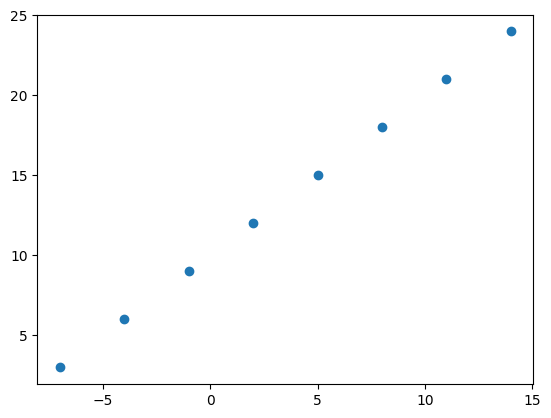

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creating features
X = np.array([float(i) for i in range(-7, 15, 3)])

# Creating labels
y = np.array(X+10)

# Visualize
plt.scatter(X, y)

Above is our input and output data. We can always increase it to better our model.

## Regression input shapes and output shapes

The **input shape** is the shape of your data that goes into the model.

The **output shape** is the shape of your data you want to come out of your model.

Before, we created data using NumPy arrays, but we could do the same with tensors.



In [3]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
house_info.shape


TensorShape([3])

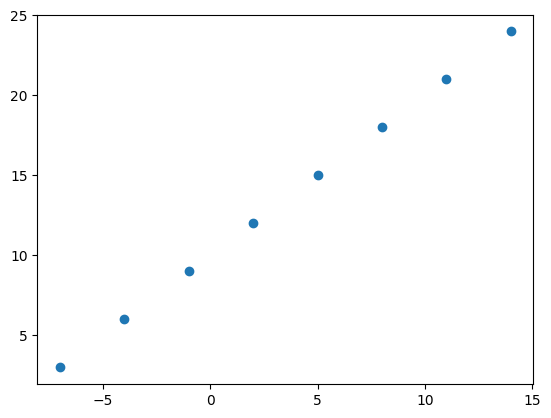

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([float(i) for i in range(-7, 15,3)])
# X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant(X+10)
# y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [6]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. Creating a model - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. Compiling a model - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. Fitting a model - letting the model try to find patterns in the data (how does X get to y).

In [7]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compiling the model
model_1.compile(loss=tf.keras.losses.mae, # mae: mean absolute error
                optimizer=tf.keras.optimizers.SGD(), # SGD : stochastic gradient descent
                metrics=["mae"])

# Fitting the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=5)


Epoch 1/5
1/1 [==============================] - 1s 579ms/step - loss: 11.2424 - mae: 11.2424
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1099 - mae: 11.1099
Epoch 3/5
1/1 [==============================] - 0s 29ms/step - loss: 10.9774 - mae: 10.9774
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 10.8449 - mae: 10.8449
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 10.7124 - mae: 10.7124


In [8]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
# predicting with the model
model_1.predict([17.])

1/1 [==============================] - 0s 92ms/step


array([[13.990644]], dtype=float32)

In [10]:
17 +10


27

In [11]:
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [12]:
# build a model with more epochs to increase the accuracy

# Set random seed
tf.random.set_seed(42)

# create a model (same as before)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# fit
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)




Epoch 1/100
1/1 [==============================] - 0s 347ms/step - loss: 14.2494 - mae: 14.2494
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 14.1169 - mae: 14.1169
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.9844 - mae: 13.9844
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 13.8519 - mae: 13.8519
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 13.7194 - mae: 13.7194
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 13.5869 - mae: 13.5869
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 13.4544 - mae: 13.4544
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 13.3219 - mae: 13.3219
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1894 - mae: 13.1894
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0569 - mae: 13.0569
Epoch 11/100
1/1 [==============================

In [13]:
model_2.predict([17])

1/1 [==============================] - 0s 135ms/step


array([[29.375242]], dtype=float32)

In [14]:
# Lets create bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [15]:
# labels
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set

* Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

In [16]:
len(X)

50

In [17]:
# Split data into train and test sets
X_train = X[:40] # 80%
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

## Visualizing the data

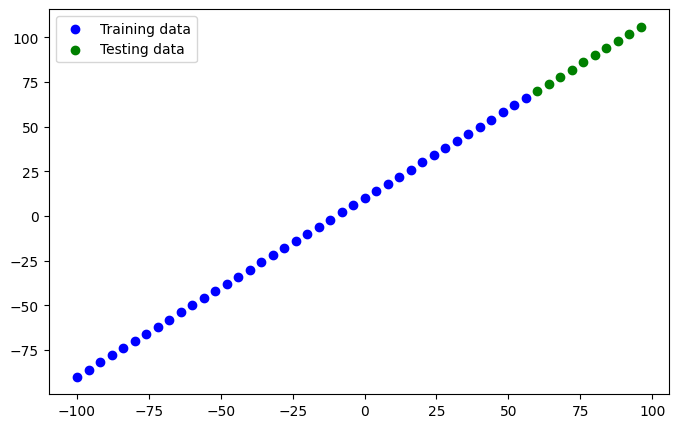

In [18]:
plt.figure(figsize=(8, 5))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

In [19]:
# set random seed
tf.random.set_seed(42)

# create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

#fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=5)
# model_3.fit(X_train, y_train, epochs=5)

Epoch 1/5
2/2 [==============================] - 1s 14ms/step - loss: 78.3351 - mae: 78.3351
Epoch 2/5
2/2 [==============================] - 0s 16ms/step - loss: 42.9709 - mae: 42.9709
Epoch 3/5
2/2 [==============================] - 0s 24ms/step - loss: 10.6084 - mae: 10.6084
Epoch 4/5
2/2 [==============================] - 0s 23ms/step - loss: 9.6371 - mae: 9.6371
Epoch 5/5
2/2 [==============================] - 0s 13ms/step - loss: 10.5529 - mae: 10.5529


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_3.predict([96])

1/1 [==============================] - 0s 312ms/step


array([[97.13637]], dtype=float32)

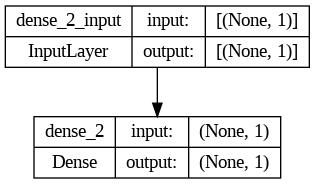

In [23]:
from tensorflow.keras.utils import plot_model

plot_model(model_3, show_shapes=True)

## Visualizing the predictions

 we'll make some predictions on the test data (X_test), remember the model has never seen the test data.



In [24]:
# Make predictions
y_preds = model_3.predict(X_test)

1/1 [==============================] - 0s 35ms/step


In [25]:
y_preds

array([[60.722183],
       [64.7682  ],
       [68.814224],
       [72.860245],
       [76.906265],
       [80.952286],
       [84.99831 ],
       [89.04433 ],
       [93.09035 ],
       [97.13637 ]], dtype=float32)

we get a list of numbers but how do these compare to the ground truth labels?

Let's build a plotting function to find out.

In [26]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_preds):
  """
  Plots training data, test data and predictions
  """
  plt.figure(figsize=(8,5))
  #Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label = "Training data")
  #Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label = "Testing data")
  # Plot predictions in red
  plt.scatter(test_data, predictions , c="r", label = "Predictions ")
  # Show the legend
  plt.legend();


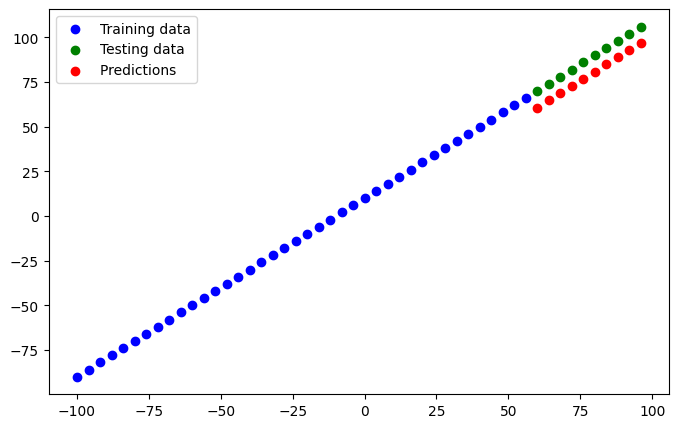

In [27]:
plot_predictions(train_data = X_train,
                  train_labels = y_train,
                  test_data = X_test,
                  test_labels = y_test,
                  predictions = y_preds)



## Evaluating predictions

We can also use model.evaluate() which will return the loss of the model as well as any metrics setup during the compile step.

* Mean absolute error (MAE) - the mean difference between each of the predictions.


In [28]:
# Evaluate the model
model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 246ms/step - loss: 9.0707 - mae: 9.0707


[9.070724487304688, 9.070724487304688]

In [29]:
# calculating the mae
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred= y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([27.277817, 23.231796, 19.185776, 15.711804, 13.056241, 11.219086,
       10.200338, 10.      , 10.61807 , 12.054547], dtype=float32)>

We should have gotten a single output but not here


In [30]:
# lets check the shape of y_test and y_preds
y_test.shape, y_preds.shape

((10,), (10, 1))

Both are not equal

Lets try using squeeze() to remove 1 dimension from y_preds

In [31]:
# shape before squeeze
y_preds.shape

(10, 1)

In [33]:
# shape after squeeze
y_preds.squeeze().shape

(10,)

In [36]:
# Calcuate the  mae
mae = tf.metrics.mean_absolute_error(y_true = y_test,
                                     y_pred = y_preds.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=9.0707245>

In [37]:
# calculate the mse (mean square error)
mse = tf.metrics.mean_squared_error(y_true= y_test,
                                    y_pred = y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=82.29552>

We can also calculate the MAE using pure TensorFlow functions.



In [38]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))


<tf.Tensor: shape=(), dtype=float64, numpy=9.070724487304688>

Again, it's a good idea to functionize anything you think you might use over again (or find yourself using over and over again).

Let's make functions for our evaluation metrics.

In [39]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)
